# (Exploratory Data Anaysis- Forb bike trip data from 2019)
## by (Jawwad Hussain)

## Preliminary Wrangling

> The dataset provided for this project is from Fordbike set which is from February 2019.
> It contains information for individual bikers regarding their date of birth, their subscription type, their start and end station names and Ids.
> The data also contains duration in seconds regarding the biker's trip and their corresponding Gender.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [287]:
#Loading and exploring bike data.
bike= pd.read_csv('C:/Users/hussaja/Documents/Udacity_DataAnalytics_NanoDegree/Course5- Data Visualization/Project/201902-fordgobike-tripdata.csv')
print(bike.shape)
print(bike.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [240]:
bike.head()

duration_sec start_time end_time  start_station_id  \
0         52185    32:10.1  01:56.0              21.0   
1         42521    53:21.8  42:03.1              23.0   
2         61854    13:13.2  24:08.1              86.0   
3         36490    54:26.0  02:36.8             375.0   
4          1585    54:18.5  20:44.1               7.0   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
1                     The Embarcadero at Steuart St               37.791464   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   

   start_station_longitude  end_station_id  \
0              -122.400811            13.0   
1              -122.391034            81.0   
2              -122.426826             3.0   
3              -122.446546            70.0   
4              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  prop_startbikest  duration_min  \
0          Male                      No               NaN    869.750000   
1           NaN                      No               NaN    708.683333   
2          Male                      No               NaN   1030.900000   
3         Other                      No               NaN    608.166667   
4          Male                     Yes               NaN     26.416667   

   duration_hr   age  
0    14.495833  35.0  
1    11.811389   NaN  
2    17.181667  47.0  
3    10.136111  30.0  
4     0.440278  45.0

### Structure of the dataset?

> The bike share data consists of 183,412 rows and 16 columns. The variables are in integer, float and string format.
> There are 8,265 NULL entries in member birth year and member gender columns.
> Out of 16 variables, 9 are are numerical, 2 are datetime and 4 are object type and 1 is Boolean(Y/N) form.

### Main ain feature(s) of interest in the dataset?

> Overall looking for how trip duration is dependent on other specifications from the dataset.
> Which stations take the most traffic and why.
> Which genders get more bike rentals.
> What is the proportion of gender and their subscription type(Customer or Subscriber).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I assume that the trip duration will have dependencies on the start and end station types. Also will investigate if it has any correlation with the customer's subscription type (customer or subscriber) and their age and genders.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [321]:
bike['duration_min']= bike['duration_sec']/60
bike.head()
bike['duration_hr']= bike['duration_min']/60
bike.head()

duration_sec start_time end_time  start_station_id  \
0         52185    32:10.1  01:56.0              21.0   
1         42521    53:21.8  42:03.1              23.0   
2         61854    13:13.2  24:08.1              86.0   
3         36490    54:26.0  02:36.8             375.0   
4          1585    54:18.5  20:44.1               7.0   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
1                     The Embarcadero at Steuart St               37.791464   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   

   start_station_longitude  end_station_id  \
0              -122.400811            13.0   
1              -122.391034            81.0   
2              -122.426826             3.0   
3              -122.446546            70.0   
4              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip   age  duration_min  duration_hr  
0          Male                      No  35.0    869.750000    14.495833  
1           NaN                      No   NaN    708.683333    11.811389  
2          Male                      No  47.0   1030.900000    17.181667  
3         Other                      No  30.0    608.166667    10.136111  
4          Male                     Yes  45.0     26.416667     0.440278

In [315]:
# Univariate plot for trip duration in seconds and hours.
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
binsize = 500
bins_sec = np.arange(0, bike['duration_sec'].max()+binsize, binsize)
plt.hist(data = bike, x = 'duration_sec', bins = bins_sec)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])


[-500, 10000, 0, 90000]

> There is a long tail in the distribution so lets put it on log scale.

C:\Users\hussaja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


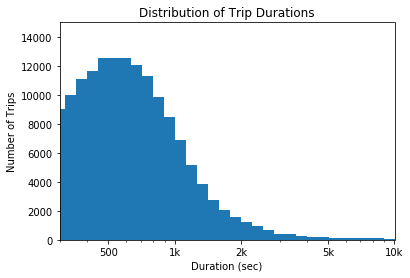

In [217]:
bins= 10**np.arange(0, 5+1,0.05)
plt.hist(data=bike,x='duration_sec',bins=bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.xlim(300,10000);
plt.show()

#### Trip duration is mostly concentrated between 500 to 1000 secs. Also, Number of trips start rising from 8000 trips start rising from 8000 all the way to 12500 trips.

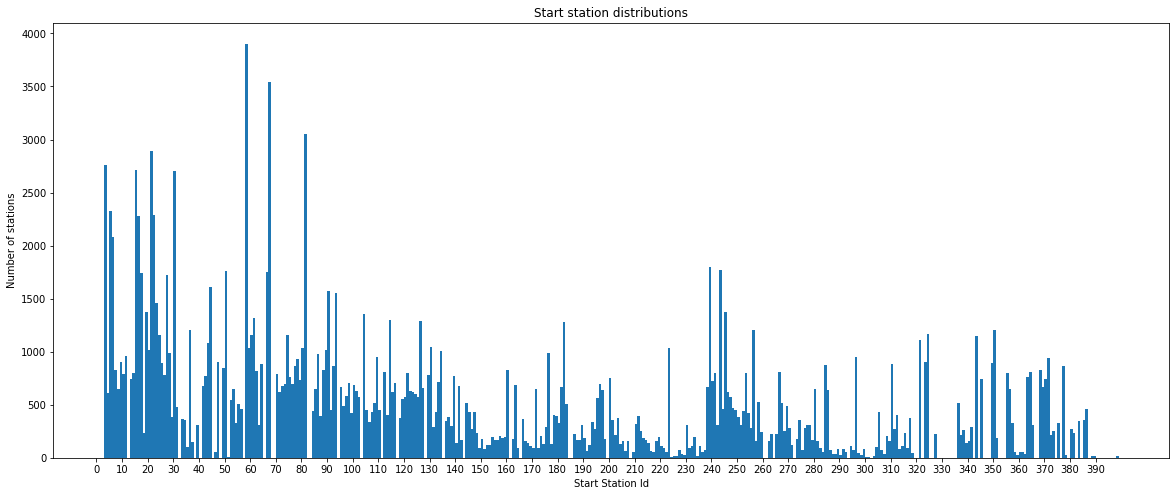

In [276]:
# Univariate plot for start station ids.
plt.figure(figsize=[20,8])
bin_start_station= np.arange(3,398+2,1)
plt.hist(data=bike,x='start_station_id',bins=bin_start_station);
plt.xticks(range(0, 400, 10));
plt.title('Start station distributions');
plt.xlabel('Start Station Id');
plt.ylabel('Number of stations');

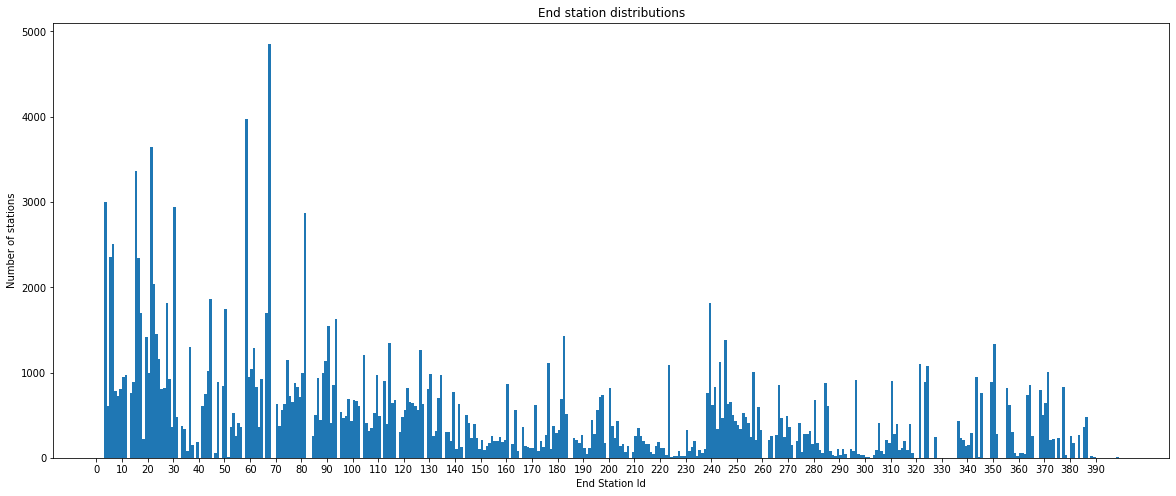

In [275]:
# Univariate plot for end station ids.
plt.figure(figsize=[20,8])
bin_end_station= np.arange(3,398+2,1)
plt.hist(data=bike,x='end_station_id',bins=bin_end_station);
plt.xticks(range(0, 400, 10));
plt.title('End station distributions');
plt.xlabel('End Station Id');
plt.ylabel('Number of stations');

#### From the above two distributions, it is clear that both start and stop stations ids are the same in terms of traffic distributions.

In [298]:
# Adding age column in the dataset to compute the member's age. Dataset belongs to 2019 so computing it with that year.
bike['age']= 2019 - bike['member_birth_year']

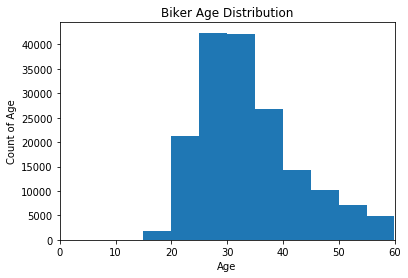

In [346]:
# Plotting the age in histogram format.
bins_age= np.arange(15,141+1,5)
plt.hist(data=bike,x='age',bins=bins_age);
plt.xlim(0,60);
plt.title('Biker Age Distribution');
plt.xlabel('Age');
plt.ylabel('Count of Age');

#### It looks like that the age distribution of the bikers range between 25 to 35 following the mode of the histogram. Bikers with most counts are in the younger age bracket. There are few outliers for sure where age >100 years.  In total 72 rows found where age>=100 years.

In [31]:
# Calculating % of ending station traffic.
prop_endbikest= bike.end_station_name.value_counts()/bike.end_station_name.value_counts().sum()*100
prop_endbikest

San Francisco Caltrain Station 2  (Townsend St at 4th St)    2.650984
Market St at 10th St                                         2.168491
Montgomery St BART Station (Market St at 2nd St)             1.990558
San Francisco Ferry Building (Harry Bridges Plaza)           1.838277
Powell St BART Station (Market St at 4th St)                 1.635783
                                                               ...   
Parker Ave at McAllister St                                  0.004912
Palm St at Willow St                                         0.003821
16th St Depot                                                0.003275
21st Ave at International Blvd                               0.003275
Willow St at Vine St                                         0.002729
Name: end_station_name, Length: 329, dtype: float64

> Looks like Market St at 10th Stm San Francisco Caltrain Station 2, Montgomery St BART Station and Powell St BART Station carry siginificant amount of % traffic in terms of starting stations.
> Similar observation is found on these stations as the ending one.


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Looking at the hour wise bike share duration, it looks like the histogram points towards peak around 600 seconds whis is approximately 0.2 hours. The trip duration had a long tail so had to transform it in the log scale.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Birth year had to be converted to age by taking 2019 as baseline year since the data belongs to Feb 2019. Also, start and end station ids had to be plotted on a larger scale to show clear correlation of station traffic.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

No handles with labels found to put in legend.


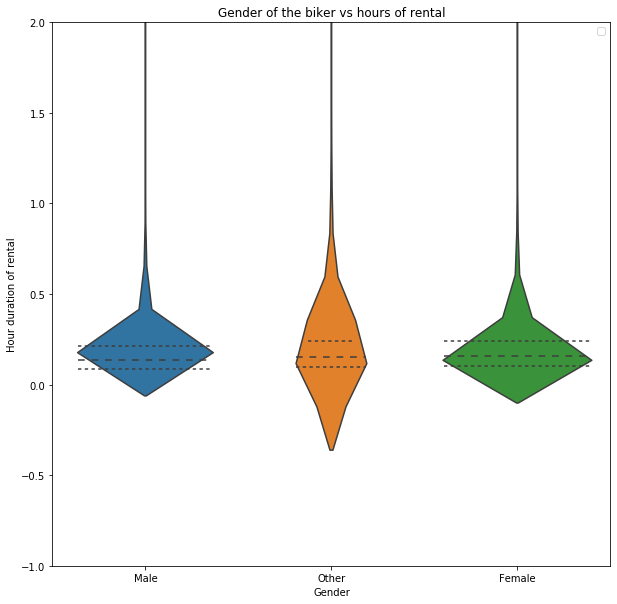

In [336]:
# Calculating which gender rents the for longer hours.
bike.head()
plt.figure(figsize=[10,10])
sb.violinplot(data=bike,x='member_gender',y='duration_hr',inner='quartile');
plt.ylim(-1,2);
plt.xlabel('Gender');
plt.ylabel('Hour duration of rental');
plt.title('Gender of the biker vs hours of rental');
plt.legend();

In [107]:
# Checking the median of the gender.
bike.query('member_gender=="Female"').duration_hr.median(),bike.query('member_gender=="Male"').duration_hr.median(),bike.query('member_gender=="Other"').duration_hr.median()


(0.15777777777777777, 0.13694444444444445, 0.15416666666666667)

In [ ]:
> From the  violine plot, it looks like Females have more data samples bike rentals while the median of hours is slightly higher than the other two genders.

In [120]:
# Finding which gender based on it's subscription rents more bikes.
bike.groupby(['member_gender'])['user_type'].value_counts().sort_values

<bound method Series.sort_values of member_gender  user_type 
Female         Subscriber     36197
               Customer        4647
Male           Subscriber    119122
               Customer       11529
Other          Subscriber      3197
               Customer         455
Name: user_type, dtype: int64>

In [121]:
# Finding which subscriber rides more bikes vs genders.
sb.countplot(data= bike, x='member_gender',hue='user_type');
plt.xticks(rotation=15);
plt.xlabel('Gender');
plt.ylabel('Count of rides');

#### The plot above shows that Subscriber type customer rides more bikes vs Customer type since more people use their subscription vs the new customers.

In [126]:
bike.head()

duration_sec start_time end_time  start_station_id  \
0         52185    32:10.1  01:56.0              21.0   
1         42521    53:21.8  42:03.1              23.0   
2         61854    13:13.2  24:08.1              86.0   
3         36490    54:26.0  02:36.8             375.0   
4          1585    54:18.5  20:44.1               7.0   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
1                     The Embarcadero at Steuart St               37.791464   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   

   start_station_longitude  end_station_id  \
0              -122.400811            13.0   
1              -122.391034            81.0   
2              -122.426826             3.0   
3              -122.446546            70.0   
4              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  prop_startbikest  duration_min  \
0          Male                      No               NaN    869.750000   
1           NaN                      No               NaN    708.683333   
2          Male                      No               NaN   1030.900000   
3         Other                      No               NaN    608.166667   
4          Male                     Yes               NaN     26.416667   

   duration_hr  
0    14.495833  
1    11.811389  
2    17.181667  
3    10.136111  
4     0.440278

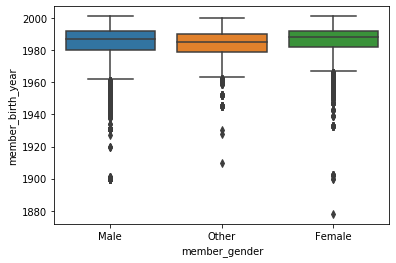

In [127]:
# Finding the relationship between the gender and their year of birth.
sb.boxplot(data=bike,x='member_gender',y='member_birth_year');

> The boxplot for bivariate relationship shows that on average Females in the dataset are 1 year younger than Men and 2 year younger than Other Genders.

In [137]:
bike.query('member_gender=="Female"').member_birth_year.mean(),bike.query('member_gender=="Male"').member_birth_year.mean(),bike.query('member_gender=="Other"').member_birth_year.mean()

(1985.7825384389384, 1984.5483999357066, 1983.1210295728367)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Noticed that 'Subscriber' type customers have more counts of bike rides vs the 'Customer' types.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Notice that the bike riders are generally younger population mainly in 25 to 40 years of age brackets.
> There are some outlier points where some bikers are older than 100 years though.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [277]:
bike.head()

duration_sec start_time end_time  start_station_id  \
0         52185    32:10.1  01:56.0              21.0   
1         42521    53:21.8  42:03.1              23.0   
2         61854    13:13.2  24:08.1              86.0   
3         36490    54:26.0  02:36.8             375.0   
4          1585    54:18.5  20:44.1               7.0   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
1                     The Embarcadero at Steuart St               37.791464   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   

   start_station_longitude  end_station_id  \
0              -122.400811            13.0   
1              -122.391034            81.0   
2              -122.426826             3.0   
3              -122.446546            70.0   
4              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  prop_startbikest  duration_min  \
0          Male                      No               NaN    869.750000   
1           NaN                      No               NaN    708.683333   
2          Male                      No               NaN   1030.900000   
3         Other                      No               NaN    608.166667   
4          Male                     Yes               NaN     26.416667   

   duration_hr   age  
0    14.495833  35.0  
1    11.811389   NaN  
2    17.181667  47.0  
3    10.136111  30.0  
4     0.440278  45.0

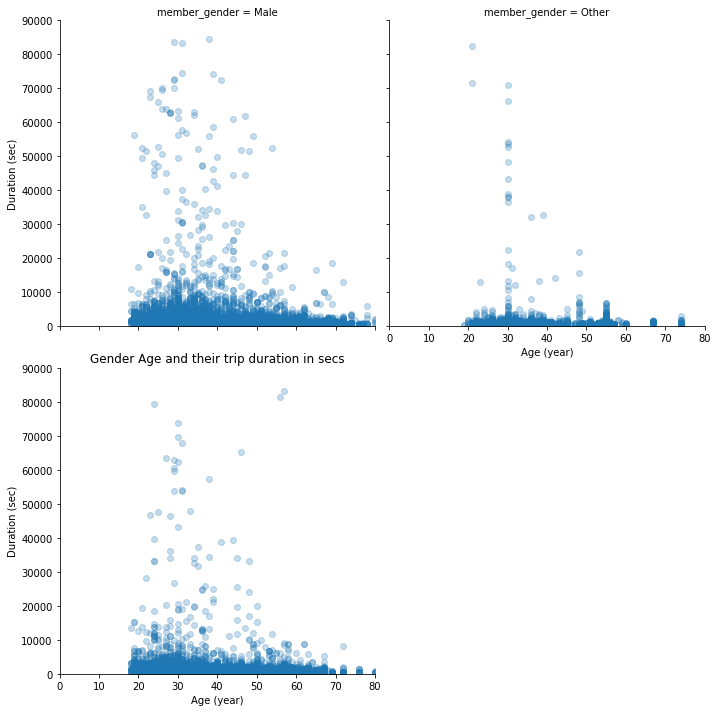

In [328]:
# Plotting multivariate plot for gender vs duration(sec) with respect to their age.
g= sb.FacetGrid(data= bike,col='member_gender',col_wrap=2,size=5);
g=g.map(plt.scatter,'age','duration_sec',alpha=0.25);
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')
plt.title('Gender Age and their trip duration in secs');
plt.xlim(0,80);
plt.ylim(0,90000)
plt.show();

#### In the above plot, we see jump in the duration for 'Other' gender specially above 50 years of age.

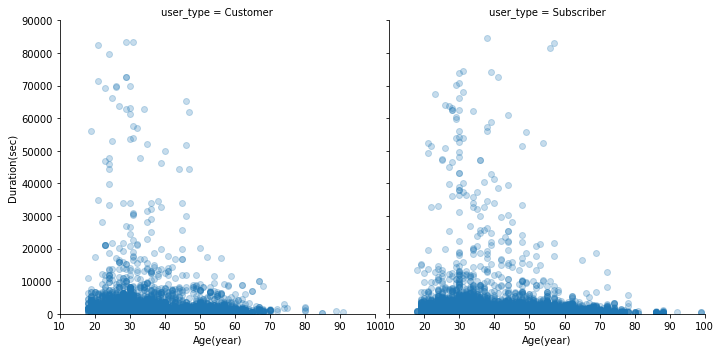

In [303]:
# Multivariate plot for age of the users vs their subscription time and trip duration.
g= sb.FacetGrid(data=bike,col='user_type',col_wrap=2,size=5);
g=g.map(plt.scatter,'age','duration_sec',alpha=0.25);
g.set_xlabels('Age(year)');
g.set_ylabels('Duration(sec)')
plt.xlim(10,100);
plt.ylim(0,90000);
plt.show();

#### Higher age subscribers are more in the 'Subscriber' category while both category's Age and trip duration take the same trend.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It was observed that though the number of higher duration trip is higher for male but percentage is higher for women and other, also other has one more peak at nearly the age of 60 years for higher duration time. For different user types both are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers having better trip duration.

### Were there any interesting or surprising interactions between features?

> There are two peaks for older people in other gender category which is surprising.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!